In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [119]:
X = data[["YearBuilt", "OverallQual", "FullBath", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GarageArea", "MoSold", "OverallCond"]].values
Y = data[["SalePrice"]].values

In [120]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

((1168, 9), (292, 9), (1168, 1), (292, 1))

In [121]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9 , activation="sigmoid"),
    tf.keras.layers.Dense(128 , activation="relu"),
    tf.keras.layers.Dense(64 , activation="relu"),
    tf.keras.layers.Dense(32 , activation="relu"),
    tf.keras.layers.Dense(8 , activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")   # because it is a regression problem
])

In [122]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

In [123]:
output = model.fit(X_train, Y_train, epochs=150)

Epoch 1/150
37/37 [==============================] - 1s 2ms/step - loss: 38383439872.0000
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 38376636416.0000
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 38312488960.0000
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 37968515072.0000
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 36728070144.0000
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 33552457728.0000
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 27257303040.0000
Epoch 8/150
37/37 [==============================] - 0s 2ms/step - loss: 18091264000.0000
Epoch 9/150
37/37 [==============================] - 0s 2ms/step - loss: 9560538112.0000
Epoch 10/150
37/37 [==============================] - 0s 2ms/step - loss: 6022100992.0000
Epoch 11/150
37/37 [==============================] - 0s 3ms/step - loss: 5688454144.0000
Epoch 12/15

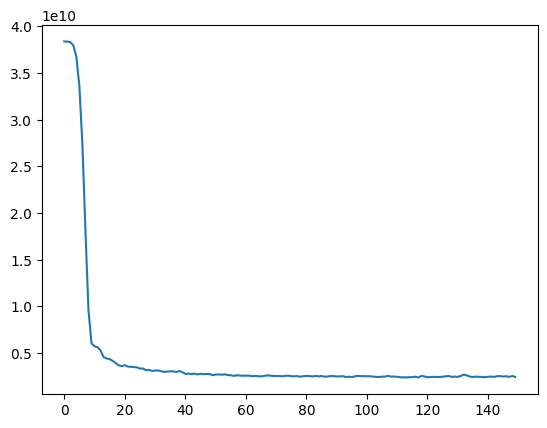

In [124]:
plt.plot(output.history["loss"])
plt.show()

In [125]:
X_valid.shape, Y_valid.shape

((292, 9), (292, 1))

In [126]:
model.evaluate(X_valid, Y_valid)

10/10 [==============================] - 0s 4ms/step - loss: 3342774528.0000


3342774528.0

In [127]:
house1 = np.array([[2020, 8, 2, 1040, 800, 200, 150, 5, 6]])
model.predict(house1)

1/1 [==============================] - 0s 80ms/step


array([[131976.86]], dtype=float32)

In [129]:
model.save("/content/drive/MyDrive/my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
